In [6]:

import plotly.express as px
from plotly.subplots import make_subplots
import math
import plotly.io as pio
import pandas as pd
import plotly.graph_objects as go


In [559]:
def read_new_oscilloscope(src):
    
    ch1_file = open(os.path.join(src))

    ch1 = ch1_file.read()

    ch1_file.close()
    
    ch1_lines = ch1.strip().split('\n')

    parsed_data = {}

    for i in range(23):
        key,value = ch1_lines[i].strip().split(',')[:2]
        parsed_data[key] = value
    
    ch1_wave = {'time':[],'voltage':[]}
    for i in ch1_lines[25:]:
        try:
            time,voltage = i.strip().split(',')[:2]
        except:
            print('bad parsing data'+i)
        ch1_wave['time'].append(float(time))
        ch1_wave['voltage'].append(float(voltage))

    parsed_data['ch1'] = ch1_wave
    return (parsed_data)

def read_old_oscilloscope(src):
    channels = []
    
    for file in os.listdir(src):
        if file.endswith(".CSV"):
            channels.append(file)
    
    channel_1 , channel_2 = None , None

    for i in channels:
        if i.find("CH1")!=-1:
            channel_1 = i
        if i.find("CH2")!=-1:
            channel_2 = i 
    
    ch1_file = open(os.path.join(src,channel_1))
    ch2_file = open(os.path.join(src,channel_2))
    
    ch1 = ch1_file.read()
    ch2 = ch2_file.read()

    ch1_file.close()
    ch2_file.close()
    
    ch1_lines = ch1.strip().split('\n')
    ch2_lines = ch2.strip().split('\n')

    parsed_data = {}

    for i in range(14):
        key,value = ch1_lines[i].strip().split(',')[:2]
        parsed_data[key] = value
    
    ch1_wave = {'time':[],'voltage':[]}
    for i in ch1_lines[16:]:
        try:
            time,voltage = i.strip().split(',')[:2]
        except:
            print('bad parsing data'+i)
        ch1_wave['time'].append(float(time))
        ch1_wave['voltage'].append(float(voltage))

    ch2_wave ={'time':[],'voltage':[]}
    for i in ch2_lines[16:]:
        try:
            time,voltage = i.strip().split(',')[:2]
        except:
            print('bad parsing data : '+i)
        ch2_wave['time'].append(float(time))
        ch2_wave['voltage'].append(float(voltage))

    parsed_data['ch1'] = ch1_wave
    parsed_data['ch2'] = ch2_wave
    return (parsed_data)

In [32]:
import os 
import plotly.graph_objects as go
from ipywidgets import widgets
from plotly.subplots import make_subplots


src_1 = './DS0001.CSV'
src_2 = './DS0002.CSV'
src_3 = './DS0003.CSV'

files_1 = read_new_oscilloscope(src_1)
files_2 = read_new_oscilloscope(src_2)
files_3 = read_new_oscilloscope(src_3)


ch1_div = 10
ch2_div = 10
ch3_div = 10


ch1_div_widget = widgets.Dropdown(
options=['1mV','10mV','50mV','200mV','500mV','1V', '5V', '10V'],
value='10V',
description='Ch_1 (v/div) :',
disabled=False)

ch2_div_widget = widgets.Dropdown(
options=['1mV','10mV','50mV','200mV','500mV','1V', '5V', '10V'],
value='10V',
description='Ch_2 (v/div) :',
disabled=False)

ch3_div_widget = widgets.Dropdown(
options=['1mV','10mV','50mV','200mV','500mV','1V', '5V', '10V'],
value='10V',
description='Ch_3 (v/div) :',
disabled=False)



ch1_trace = go.Scatter(
x=files_1['ch1']['time'],
y=list(map(lambda x:x/ch1_div,files_1['ch1']['voltage'])),
mode='markers',
marker=dict(size=4,),
name= 'Under damp ( Div : '+ch1_div_widget.value+' )',customdata=files_1['ch1']['voltage'],
hovertemplate='<b>Voltage : %{customdata:.3f} </b>')

ch2_trace = go.Scatter(
x=files_2['ch1']['time'],
y=list(map(lambda x:x/ch1_div,files_2['ch1']['voltage'])),
mode='markers',
marker=dict(size=4,),
name= 'Critical damp ( Div : '+ch2_div_widget.value+' )',customdata=files_2['ch1']['voltage'],
hovertemplate='<b>Voltage : %{customdata:.3f} </b>')

ch3_trace = go.Scatter(
x=files_3['ch1']['time'],
y=list(map(lambda x:x/ch1_div,files_3['ch1']['voltage'])),
mode='markers',
marker=dict(size=4,),
name= 'Over damp ( Div : '+ch3_div_widget.value+' )',customdata=files_3['ch1']['voltage'],
hovertemplate='<b>Voltage : %{customdata:.3f} </b>')


Xaxis_title = "t"
Yaxis_title = "Voltage / Div"
Legend_title = "wave"

fig = go.FigureWidget(data=[ch1_trace,ch2_trace,ch3_trace],
    layout=go.Layout(xaxis_title=Xaxis_title,
    yaxis_title=Yaxis_title,
    legend_title=Legend_title,
    hovermode='x unified',
    title=dict(text='Output'),font=dict(family='Microsoft JhengHei', size=18,), xaxis=dict(tickangle=0)))

fig.update_yaxes(range=[-5, 5])
fig.update_xaxes(range=[0.00498, 0.0054])

def response(change):
    if ch1_div_widget.value=='1mV':  
        ch1_div = 0.001
    elif ch1_div_widget.value=='10mV': 
        ch1_div = 0.01
    elif ch1_div_widget.value=='50mV': 
        ch1_div = 0.05
    elif ch1_div_widget.value=='200mV': 
        ch1_div = 0.2
    elif ch1_div_widget.value=='500mV': 
        ch1_div = 0.5
    elif ch1_div_widget.value=='1V': 
        ch1_div = 1
    elif ch1_div_widget.value=='5V': 
        ch1_div = 5
    elif ch1_div_widget.value=='10V': 
        ch1_div = 10
    if ch2_div_widget.value=='1mV':  
        ch2_div = 0.001
    elif ch2_div_widget.value=='10mV': 
        ch2_div = 0.01
    elif ch2_div_widget.value=='50mV': 
        ch2_div = 0.05
    elif ch2_div_widget.value=='200mV': 
        ch2_div = 0.2
    elif ch2_div_widget.value=='500mV': 
        ch2_div = 0.5
    elif ch2_div_widget.value=='1V': 
        ch2_div = 1
    elif ch2_div_widget.value=='5V': 
        ch2_div = 5
    elif ch2_div_widget.value=='10V': 
        ch2_div = 10
    if ch2_div_widget.value=='1mV':  
        ch3_div = 0.001
    elif ch3_div_widget.value=='10mV': 
        ch3_div = 0.01
    elif ch3_div_widget.value=='50mV': 
        ch3_div = 0.05
    elif ch3_div_widget.value=='200mV': 
        ch3_div = 0.2
    elif ch3_div_widget.value=='500mV': 
        ch3_div = 0.5
    elif ch3_div_widget.value=='1V': 
        ch3_div = 1
    elif ch3_div_widget.value=='5V': 
        ch3_div = 5
    elif ch3_div_widget.value=='10V': 
        ch3_div = 10

    with fig.batch_update():
        fig.data[0].y = list(map(lambda x:x/ch1_div,files_1['ch1']['voltage']))
        fig.data[0].name = 'ch 1 ( Div : '+ch1_div_widget.value+' )'
        fig.data[1].y = list(map(lambda x:x/ch2_div,files_2['ch1']['voltage']))
        fig.data[1].name = 'ch 2 ( Div : '+ch2_div_widget.value+' )'
        fig.data[2].y = list(map(lambda x:x/ch3_div,files_3['ch1']['voltage']))
        fig.data[2].name = 'ch 3 ( Div : '+ch3_div_widget.value+' )'


ch1_div_widget.observe(response, names="value")
ch2_div_widget.observe(response, names="value")
ch3_div_widget.observe(response, names="value")


widgets.VBox([ch1_div_widget,ch2_div_widget,ch3_div_widget,
              fig])

In [563]:
src_1 = './DS0001.CSV'
src_2 = './DS0002.CSV'
src_3 = './DS0003.CSV'

files_1 = read_new_oscilloscope(src_1)
files_2 = read_new_oscilloscope(src_2)
files_3 = read_new_oscilloscope(src_3)


ch1_div = 10
ch2_div = 10
ch3_div = 10

ch1_trace = go.Scatter(
x=files_1['ch1']['time'],
y=list(map(lambda x:x/ch1_div,files_1['ch1']['voltage'])),
mode='markers',
marker=dict(size=4,),
name= 'Critical damp ( Div : '+str(ch1_div)+' )',customdata=files_1['ch1']['voltage'],
hovertemplate='<b>Voltage : %{customdata:.3f} </b>')

ch2_trace = go.Scatter(
x=files_2['ch1']['time'],
y=list(map(lambda x:x/ch1_div,files_2['ch1']['voltage'])),
mode='markers',
marker=dict(size=4,),
name= 'Under damp ( Div : '+str(ch1_div)+' )',customdata=files_2['ch1']['voltage'],
hovertemplate='<b>Voltage : %{customdata:.3f} </b>')

ch3_trace = go.Scatter(
x=files_3['ch1']['time'],
y=list(map(lambda x:x/ch1_div,files_3['ch1']['voltage'])),
mode='markers',
marker=dict(size=4,),
name= 'Over damp ( Div : '+str(ch1_div)+' )',customdata=files_3['ch1']['voltage'],
hovertemplate='<b>Voltage : %{customdata:.3f} </b>')


Xaxis_title = "t"
Yaxis_title = "Voltage / Div"
Legend_title = "wave"

fig = go.Figure()
fig.add_trace(ch2_trace)
fig.add_trace(ch1_trace)

fig.add_trace(ch3_trace)

Xaxis_title = "Time"
Yaxis_title = "Volt / Div"
fig['layout'].update(xaxis_title=Xaxis_title,
                        yaxis_title=Yaxis_title,
                        font=dict(family='Microsoft JhengHei', size=18,), xaxis=dict(tickangle=0)
                        )
fig.update_yaxes(range=[-5, 5])
fig.update_xaxes(range=[0.00498, 0.0054])
fig.write_html('Output.html', auto_open=True)



In [551]:
def read_file(src):
    ch1_file = open(os.path.join(src))

    ch1 = ch1_file.read()

    ch1_file.close()
    
    ch1_lines = ch1.strip().split('\n')

    parsed_data = {}

    for i in range(23):
        key,value = ch1_lines[i].strip().split(',')[:2]
        parsed_data[key] = value
    
    volt = []

    for i in ch1_lines[25:]:
        try:
            volt.append(float(i.strip().split(',')[0]))        
        except:
            print('bad parsing data'+i)
        
    parsed_data['volt'] = volt
    return (parsed_data)

''' 
def mapping(data,y1,y2):
    maximum = max(data)
    minimum = min(data)
    interval_x = maximum-minimum
    interval_y = abs(y1-y2)
    result = []
    for i in data:
        result.append(i/interval_x*interval_y)
    return (result)
'''

def find_peaks(volt):
    peak_volt = max(volt)
    # This will storaged the result of the time where peak occured
    peak_position = []
    # TMP storage the index each group when peak value occurs
    # you can also see this as the time of each peak in group
    # since the time will be index * sample_period
    TMP = []
    # Flag used for determine the group 
    # When False and deteced peak voltage occurs 
    # it let program start to record a new group of peak point
    flag = False
    # target used to storage the first peak point in each peak 
    target = 0
    threshold = 500
    for i in range(len(volt)):
        if (volt[i] == peak_volt):
            target = i
            flag = True
            TMP.append(i)
        if (flag == True and (i>target+threshold or i==len(volt)-1)):
            # if exceed the threshold turn off the record ($flag) 
            # and push the averaged result from TMP to $peak_position
            # clear the TMP for next group
            peak_position.append(sum(TMP)//len(TMP))
            TMP = [] 
            flag = False
    return(peak_position)

def optimized_find_peaks(volt):
    peak_volt = max(volt)
    n = 0
    for i in volt:
        if i==peak_volt:
            n+=1
    if n<50:
        filter_list = set(volt)
        filter_list.remove(max(filter_list))
        peak_volt = max(filter_list)
    peak_position = []

    TMP = []

    flag = False
    target = 0
    threshold = 500
    for i in range(len(volt)):
        if (volt[i] == peak_volt):
            target = i
            flag = True
            TMP.append(i)
        if (flag == True and (i>target+threshold or i==len(volt)-1)):
            # if exceed the threshold turn off the record ($flag) 
            # and push the averaged result from TMP to $peak_position
            # clear the TMP for next group
            peak_position.append(sum(TMP)//len(TMP))
            TMP = [] 
            flag = False
    return(peak_position)

def get_label_string(magnitude):
    if (magnitude<1):
        return(str(magnitude*1000)+' mV')
    else:
        return(str(magnitude)+' V')



In [503]:
import plotly.graph_objects as go

src = '.\secound_exp\ALL0001' 


ch1 = read_file(os.path.join(src,'1.CSV')) 
ch2 = read_file(os.path.join(src,'2.CSV')) 

ch1_div = float(ch1['Vertical Scale'])
ch2_div = float(ch2['Vertical Scale'])

ch1_sample_period = float(ch1['Sampling Period'])
ch2_sample_period = float(ch2['Sampling Period'])

ch1_mapped_volt = [i*ch1_div/32 for i in ch1['volt']]
ch2_mapped_volt = [i*ch2_div/32 for i in ch2['volt']]

ch1_reveal_div = 1
ch2_reveal_div = 0.05

ch1_trace = go.Scatter(
    x=[i*ch1_sample_period for i in range(len(ch1['volt']))],
    y=[i/ch1_reveal_div for i in ch1_mapped_volt],
    mode='markers',
    name= 'Input Source       (div : '+get_label_string(ch1_reveal_div)+')' ,
)

ch2_trace = go.Scatter(
    x=[i*ch2_sample_period for i in range(len(ch2['volt']))],
    y=[i/ch2_reveal_div for i in ch2_mapped_volt],
    mode='markers',
    name= 'Resistor Voltage (div : '+get_label_string(ch1_reveal_div) +')',
)


fig = go.Figure()
fig.add_trace(ch1_trace)
fig.add_trace(ch2_trace)


Xaxis_title = "Time"
Yaxis_title = "Volt / Div"
fig['layout'].update(xaxis_title=Xaxis_title,
                        yaxis_title=Yaxis_title,
                        font=dict(family='Microsoft JhengHei', size=18,), xaxis=dict(tickangle=0)
                        )

fig.write_html('Output.html', auto_open=True)


In [507]:
import os 
import plotly.graph_objects as go

src = '.\secound_exp\ALL0002' 


ch1 = read_file(os.path.join(src,'1.CSV')) 
ch2 = read_file(os.path.join(src,'2.CSV')) 

ch1_div = float(ch1['Vertical Scale'])
ch2_div = float(ch2['Vertical Scale'])

ch1_sample_period = float(ch1['Sampling Period'])
ch2_sample_period = float(ch2['Sampling Period'])

ch1_mapped_volt = [i*ch1_div/32 for i in ch1['volt']]
ch2_mapped_volt = [i*ch2_div/32 for i in ch2['volt']]

ch1_reveal_div = 1
ch2_reveal_div = 1

ch1_trace = go.Scatter(
    x=[i*ch1_sample_period for i in range(len(ch1['volt']))],
    y=[i/ch1_reveal_div for i in ch1_mapped_volt],
    mode='markers',
    name= 'Input Source       (div : '+get_label_string(ch1_reveal_div)+')' ,
)

ch2_trace = go.Scatter(
    x=[i*ch2_sample_period for i in range(len(ch2['volt']))],
    y=[i/ch2_reveal_div for i in ch2_mapped_volt],
    mode='markers',
    name= 'Resistor Voltage (div : '+get_label_string(ch1_reveal_div) +')',
)


fig = go.Figure()
fig.add_trace(ch1_trace)
fig.add_trace(ch2_trace)


Xaxis_title = "Time"
Yaxis_title = "Volt / Div"
fig['layout'].update(xaxis_title=Xaxis_title,
                        yaxis_title=Yaxis_title,
                        font=dict(family='Microsoft JhengHei', size=18,), xaxis=dict(tickangle=0)
                        )

fig.write_html('Output.html', auto_open=True)


In [543]:
import os 
import plotly.graph_objects as go

src = '.\secound_exp\ALL0004' 


ch1 = read_file(os.path.join(src,'1.CSV')) 
ch2 = read_file(os.path.join(src,'2.CSV')) 

ch1_div = float(ch1['Vertical Scale'])
ch2_div = float(ch2['Vertical Scale'])

ch1_sample_period = float(ch1['Sampling Period'])
ch2_sample_period = float(ch2['Sampling Period'])

ch1_mapped_volt = [i*ch1_div/32 for i in ch1['volt']]
ch2_mapped_volt = [i*ch2_div/32 for i in ch2['volt']]

ch1_reveal_div = 1
ch2_reveal_div = 1

ch1_trace = go.Scatter(
    x=[i*ch1_sample_period for i in range(len(ch1['volt']))],
    y=[i/ch1_reveal_div for i in ch1_mapped_volt],
    mode='markers',
    name= 'Input Source        (div : '+get_label_string(ch1_reveal_div)+')' ,
)

ch2_trace = go.Scatter(
    x=[i*ch2_sample_period for i in range(len(ch2['volt']))],
    y=[i/ch2_reveal_div for i in ch2_mapped_volt],
    mode='markers',
    name= 'Resistor Voltage (div : '+get_label_string(ch2_reveal_div) +')',
)

fig = go.Figure()
fig.add_trace(ch1_trace)
fig.add_trace(ch2_trace)


Xaxis_title = "Time"
Yaxis_title = "Volt / Div"
fig['layout'].update(xaxis_title=Xaxis_title,
                        yaxis_title=Yaxis_title,
                        legend_title='sources',
                        font=dict(family='Microsoft JhengHei', size=18,), xaxis=dict(tickangle=0)
                        )

fig.write_html('Output.html', auto_open=True)


In [556]:
src = '.\secound_exp\ALL0002' 


ch1 = read_file(os.path.join(src,'1.CSV')) 
ch2 = read_file(os.path.join(src,'2.CSV')) 

ch1_div = float(ch1['Vertical Scale'])
ch2_div = float(ch2['Vertical Scale'])

ch1_mapped_volt = [i*ch1_div/32 for i in ch1['volt']]
ch2_mapped_volt = [i*ch2_div/32 for i in ch2['volt']]

ch1_peaks = find_peaks(ch1['volt']) 
ch2_peaks = optimized_find_peaks(ch2['volt']) 

print(ch1_peaks)
print(ch2_peaks)

[2655, 5778, 8898]
[2658, 5785, 8908]


In [557]:
def get_shift(main,slave):
    if (len(main)!=len(slave)):
        print("parse error")
        return -1
    avg_shift = 0
    tmp = []
    for i in range(len(main)-1):
        tmp.append(abs(main[i+1]-main[i]))
        tmp.append(abs(slave[i+1]-slave[i]))
    print('periods : ' ,end='')
    print(tmp)
    avg_period = sum(tmp)/len(tmp)
    tmp = []
    for i in range(len(main)):
        tmp.append(slave[i]-main[i])
    print('shifts : ' ,end='')
    print(tmp)
    avg_shift = sum(tmp)/len(tmp)

    return(avg_shift/avg_period*360)

print(f"averaged shift angle : {get_shift(ch1_peaks,ch2_peaks):.6f}")

periods : [3123, 3127, 3120, 3123]
shifts : [3, 7, 10]
averaged shift angle : 0.768430


In [448]:
def find_peak(volt):
    peak = max(volt)
    peak_position = []
    TMP = [] 
    flag = False
    target = 0
    for i in range(len(volt)):
        if (volt[i] == peak_1):
            if (not flag):
                target = i
            flag = True
            TMP.append(i)
        if (flag == True and (i>target+800 or i==len(volt)-1)):
            peak_position.append(sum(TMP)//len(TMP))
            TMP = [] 
            flag = False
    return(peak_position)


In [8]:
files = read_old_oscilloscope(src)

ch1_div = 1
ch2_div = 1

ch1_div_widget = widgets.Dropdown(
options=['1mV','10mV','50mV','200mV','500mV','1V', '5V', '10V'],
value='1V',
description='Ch_1 (v/div) :',
disabled=False)

ch2_div_widget = widgets.Dropdown(
options=['1mV','10mV','50mV','200mV','500mV','1V', '5V', '10V'],
value='1V',
description='Ch_2 (v/div) :',
disabled=False)

x = []
y = []
for i in range(len(files['ch1']['time'])):
    index = files['ch2']['time'].index(files['ch1']['time'][i])
    if index != -1:
        x.append(files['ch1']['voltage'][i])
        y.append(files['ch2']['voltage'][index])

trace = go.Scatter(
    x=list(map(lambda x:x/ch1_div,x)),
    y=list(map(lambda x:x/ch1_div,y)),
    mode='markers',
    )

Xaxis_title = "Ch1 Voltage / Div"
Yaxis_title = "Ch2 Voltage / Div"

fig = go.FigureWidget(data=[trace],
    layout=go.Layout(xaxis_title=Xaxis_title,
    yaxis_title=Yaxis_title,
    legend_title=Legend_title,
    hovermode='x unified',
    title=dict(text='Output'),font=dict(family='Microsoft JhengHei', size=18,), xaxis=dict(tickangle=0)))
fig.update_yaxes(range=[-5, 5])
fig.update_xaxes(range=[-5, 5])
def response(change):
    if ch1_div_widget.value=='1mV':  
        ch1_div = 0.001
    elif ch1_div_widget.value=='10mV': 
        ch1_div = 0.01
    elif ch1_div_widget.value=='50mV': 
        ch1_div = 0.05
    elif ch1_div_widget.value=='200mV': 
        ch1_div = 0.2
    elif ch1_div_widget.value=='500mV': 
        ch1_div = 0.5
    elif ch1_div_widget.value=='1V': 
        ch1_div = 1
    elif ch1_div_widget.value=='5V': 
        ch1_div = 5
    elif ch1_div_widget.value=='10V': 
        ch1_div = 10
    if ch2_div_widget.value=='1mV':  
        ch2_div = 0.001
    elif ch2_div_widget.value=='10mV': 
        ch2_div = 0.01
    elif ch2_div_widget.value=='50mV': 
        ch2_div = 0.05
    elif ch2_div_widget.value=='200mV': 
        ch2_div = 0.2
    elif ch2_div_widget.value=='500mV': 
        ch2_div = 0.5
    elif ch2_div_widget.value=='1V': 
        ch2_div = 1
    elif ch2_div_widget.value=='5V': 
        ch2_div = 5
    elif ch2_div_widget.value=='10V': 
        ch2_div = 10
    with fig.batch_update():
        fig.data[0].x = list(map(lambda x:x/ch1_div,x))
        fig.data[0].y = list(map(lambda x:x/ch1_div,y))


ch1_div_widget.observe(response, names="value")
ch2_div_widget.observe(response, names="value")

widgets.VBox([ch1_div_widget,
              ch2_div_widget,
              fig])

bad parsing data-8.780000
bad parsing data : -8.710


In [ ]:
def x_y_plot(ch_1,ch_2):
    x = []
    y = []
    for i in range(len(ch_1['time'])):
        index = ch_2['time'].index(ch_1['time'][i])
        if index != -1:
            x.append(ch_1['voltage'][i])
            y.append(ch_2['voltage'][index])
    trace = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    )
    fig = go.Figure()
    fig.add_trace(trace)
    Xaxis_title = "Ch_1"
    Yaxis_title = "Ch_2"
    fig['layout'].update(height=600, width=800,xaxis_title=Xaxis_title,
                        yaxis_title=Yaxis_title,
                        font=dict(family='Microsoft JhengHei', size=18,), xaxis=dict(tickangle=0)
                        )

    fig.write_html('Output.html', auto_open=True)

In [7]:
trace1 = go.Scatter(
    x=frequency,
    y=data,
    mode='markers',
    name= 'Experiment' ,
)

fig = go.Figure()
fig.add_trace(trace1)
Xaxis_title = "Frequency"
Yaxis_title = "Amp"
fig['layout'].update(height=600, width=800,xaxis_title=Xaxis_title,
                        yaxis_title=Yaxis_title,
                        font=dict(family='Microsoft JhengHei', size=18,), xaxis=dict(tickangle=0)
                        )

fig.write_html('Output.html', auto_open=True)

In [14]:
R = 993.9
L = 93.27*10**(-3)
C = 10.157*10**(-9)
print(math.sqrt((R/(2*L)**2+1/(L*C))))
print(1/(math.sqrt(L*C)*2*math.pi))

32490.1832634995
5170.903309981305


In [40]:
from scipy.io import wavfile
import scipy.io
import numpy as np
import matplotlib.pyplot as plt


C:\Users\win10\AppData\Local\Temp/ipykernel_3996/3618108805.py:1: WavFileWarning:

Chunk (non-data) not understood, skipping it.



channels = 2
length = 2.0160090702947846
int16
[[    -1  14283]
 [ 14285  27812]
 [ 27811  32767]
 ...
 [-32768 -32767]
 [-32767 -21842]
 [-21841  -8055]]
[    -1  14285  27811 ... -32768 -32767 -21841]
[ 14283  27812  32767 ... -32767 -21842  -8055]


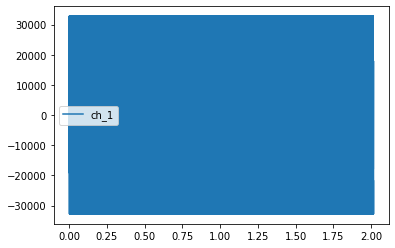

In [44]:
samplerate, signal = wavfile.read('./sample.wav')
print(f"channels = {signal.shape[1]}")
length = signal.shape[0] / samplerate
print(f"length = {length}")

print(signal.dtype)
channel_1 = signal[:,0]
channel_2 = signal[:,1]
print(signal)
print(channel_1)
print(channel_2)

plt.plot([i*(1/samplerate) for i in range(len(channel_1))],channel_1, label='ch_1')
plt.legend()
plt.show()

plt.plot([i*(1/samplerate) for i in range(len(channel_1))],channel_1, label='ch_2')
plt.legend()
plt.show()

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


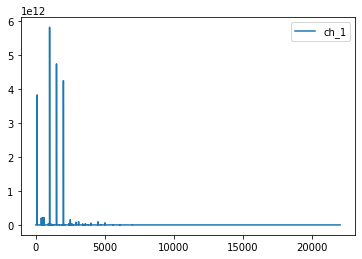

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


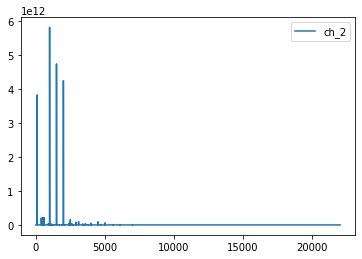

In [366]:
n = len(channel_1)
fft = np.fft.fft(channel_1,n)
PSD = fft * np.conj(fft) / n
dt = 1/samplerate
freq = 1/(dt*n) *np.arange(n)

n_2 = len(channel_2)
fft_2 = np.fft.fft(channel_2,n_2)
PSD_2 = fft_2 * np.conj(fft_2) / n_2
dt_2 = 1/samplerate
freq_2 = 1/(dt*n_2) *np.arange(n_2)


L = np.arange(1,np.floor(n/2),dtype = 'int')
plt.plot(freq[L],PSD[L],label='ch_1')
plt.legend()
plt.show()
plt.plot(freq[L],PSD_2[L],label='ch_2')
plt.legend()
plt.show()


C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


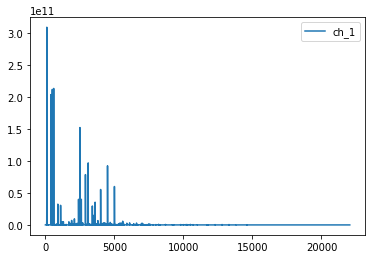

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


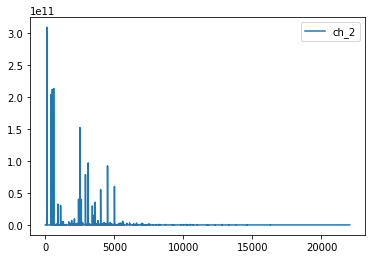

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


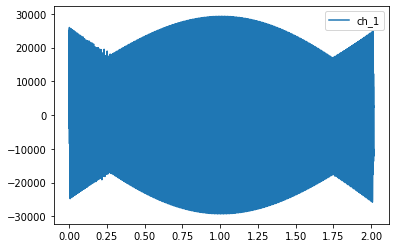

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


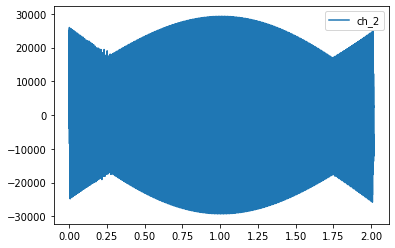

In [371]:
filter_1 = PSD<0.2*max(PSD[L])
filter_2 = PSD<0.2*max(PSD_2[L])

PSD_filtered = PSD*filter_1
fft_filtered = fft*filter_1

PSD_2_filtered = PSD_2*filter_2
fft_2_filtered = fft_2*filter_2 

filtered_sound =  np.fft.ifft(fft_filtered)
filtered_sound_2 =  np.fft.ifft(fft_2_filtered)


plt.plot(freq[L],PSD_filtered[L],label='ch_1')
plt.legend()
plt.show()
plt.plot(freq[L],PSD_2_filtered[L],label='ch_2')
plt.legend()
plt.show()

plt.plot([i*(1/samplerate) for i in range(len(filtered_sound))],filtered_sound,label='ch_1')
plt.legend()
plt.show()
plt.plot([i*(1/samplerate) for i in range(len(filtered_sound_2))],filtered_sound_2,label='ch_2')
plt.legend()
plt.show()

In [372]:
a = np.array(list(zip(filtered_sound.real.astype('int16'),filtered_sound_2.real.astype('int16'))))

wavfile.write('filtered.wav',samplerate,a)
print(a)

[[  2292   7343]
 [  7343  12234]
 [ 12231   9606]
 ...
 [ -4155 -12204]
 [-12206 -10211]
 [-10212  -5759]]


C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


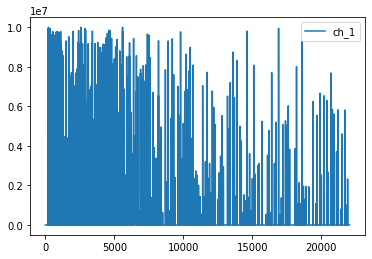

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


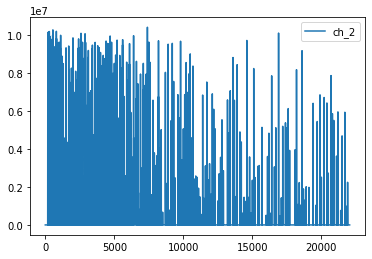

In [386]:
Upper_thershored = PSD<1*(10**6)
lower_thershored = PSD>8*(10**5)

filter_except = Upper_thershored & lower_thershored

Upper_thershored = PSD<1*(10**7)
lower_thershored = PSD>5*(10**5)

filter_main = Upper_thershored & lower_thershored


# filter_except= filter_1 & filter_2

filter = filter_main & np.logical_not(filter_except)


PSD_filtered = PSD*filter
fft_filtered = fft*filter 

PSD_2_filtered = PSD_2*filter
fft_2_filtered = fft_2*filter 

filtered_sound =  np.fft.ifft(fft_filtered)
filtered_sound_2 =  np.fft.ifft(fft_2_filtered)

plt.plot(freq[L],PSD_filtered[L],label='ch_1')
plt.legend()
plt.show()

plt.plot(freq[L],PSD_2_filtered[L],label='ch_2')
plt.legend()
plt.show()

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


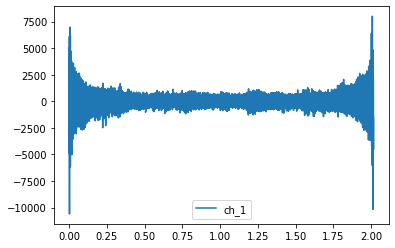

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


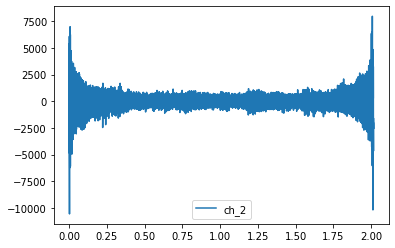

In [387]:
filtered_sound = filtered_sound
filtered_sound_2=filtered_sound_2
plt.plot(dt*np.arange(len(filtered_sound)),filtered_sound,label="ch_1")
plt.legend()
plt.show()

plt.plot(dt*np.arange(len(filtered_sound)),filtered_sound_2,label="ch_2")
plt.legend()
plt.show()

In [383]:
a = np.array(list(zip(filtered_sound.real.astype('int16'),filtered_sound_2.real.astype('int16'))))

wavfile.write('filtered.wav',samplerate,a)
print(a)

[[-1240 -1420]
 [ -778 -1471]
 [-1038 -2287]
 ...
 [-2834 -2596]
 [-2157 -2240]
 [-1598 -2058]]


In [345]:
a = int(0.125*length*samplerate)

In [630]:
R = 11.91
L = 93.27*10**(-3)
C = 10.157*10**(-9)

print(math.sqrt(L/C)*(1/R))

254.43479387882533


In [632]:
R = 993.9
L = 93.27*10**(-3)
C = 10.157*10**(-9)
print(math.sqrt(L/C)*(1/R))

3.0489167875005627


In [629]:
R = 2200
L = 93.27*10**(-3)
C = 10.157*10**(-9)
print(math.sqrt(L/C)*(1/R))

1.3774174523167315


In [584]:
src = './RLC_R_11.91'

def read_file(src):
    ch1_file = open(os.path.join(src))

    ch1 = ch1_file.read()
    ch1_file.close()
    ch1_lines = ch1.strip().split('\n')
    parsed_data = {}
    try:
        for i in range(23):
            key,value = ch1_lines[i].strip().split(',')[:2]
            parsed_data[key] = value
    except:
        print('bad parssed data for src = '+ src )
        return -1

    volt = []

    for i in ch1_lines[25:]:
        try:
            volt.append(float(i.strip().split(',')[0]))        
        except:
            print('bad parsing data'+i)
        
    parsed_data['volt'] = volt
    return parsed_data


In [634]:
src_1 = './RLC_R_11.91'
src_2 = './RLC_R_993.9'
src_3 = './RLC_R_2200'

data_1 = []
for i in os.listdir(src_1):
    channels = {'ch1':'','ch2':''}
    channels['ch1'] = read_file(os.path.join(src_1,i,'1.CSV'))
    channels['ch2'] = read_file(os.path.join(src_1,i,'2.CSV'))
    data_1.append(channels)
volt_amp_1 = []
for i in range(len(data_1)):
    ch1_div = float(data_1[i]['ch1']['Vertical Scale'])
    ch2_div = float(data_1[i]['ch2']['Vertical Scale'])

    _in = max(data_1[i]['ch1']['volt'])*ch1_div/32
    _out= max(data_1[i]['ch2']['volt'])*ch2_div/32 
    volt_amp_1.append(_out/_in)

data_2 = []
for i in os.listdir(src_2):
    channels = {'ch1':'','ch2':''}
    channels['ch1'] = read_file(os.path.join(src_2,i,'1.CSV'))
    channels['ch2'] = read_file(os.path.join(src_2,i,'2.CSV'))
    data_2.append(channels)
volt_amp_2 = []
for i in range(len(data_2)):
    ch1_div = float(data_2[i]['ch1']['Vertical Scale'])
    ch2_div = float(data_2[i]['ch2']['Vertical Scale'])

    _in = max(data_2[i]['ch1']['volt'])*ch1_div/32
    _out= max(data_2[i]['ch2']['volt'])*ch2_div/32 
    volt_amp_2.append(_out/_in)

data_3 = []
for i in os.listdir(src_3):
    channels = {'ch1':'','ch2':''}
    channels['ch1'] = read_file(os.path.join(src_3,i,'1.CSV'))
    channels['ch2'] = read_file(os.path.join(src_3,i,'2.CSV'))
    data_3.append(channels)
volt_amp_3 = []
for i in range(len(data_3)):
    ch1_div = float(data_3[i]['ch1']['Vertical Scale'])
    ch2_div = float(data_3[i]['ch2']['Vertical Scale'])

    _in = max(data_3[i]['ch1']['volt'])*ch1_div/32
    _out= max(data_3[i]['ch2']['volt'])*ch2_div/32 
    volt_amp_3.append(_out/_in)

frequency_1 = [2000+i*200 for i in range(26)]
frequency_2 = [1000+i*200 for i in range(41)]
frequency_3 = [3000+i*2000 for i in range(33)]
trace_1 = go.Scatter(
    x=frequency_1,
    y=volt_amp_1,
    mode='markers',
    name= 'R = 11.91 , Q = 254.43 ' ,
)
trace_2 = go.Scatter(
    x=frequency_2,
    y=volt_amp_2,
    mode='markers',
    name= 'R = 993.9 , Q = 3.05 ' ,
)
trace_3 = go.Scatter(
    x=frequency_3,
    y=volt_amp_3,
    mode='markers',
    name= 'R = 2200 , Q = 1.37 ' ,
)

fig = go.Figure()
fig.add_trace(trace_1)
fig.add_trace(trace_2)
fig.add_trace(trace_3)


Xaxis_title = "Frequency"
Yaxis_title = "Amp ( Vout / Vin )"
fig['layout'].update(xaxis_title=Xaxis_title,
                        yaxis_title=Yaxis_title,
                        legend_title='sources',
                        font=dict(family='Microsoft JhengHei', size=18,), xaxis=dict(tickangle=0)
                        )

fig.write_html('Output.html', auto_open=True)


In [656]:
def get_shift(,main,slave):
    if (len(main)!=[] and len(slave)!=[]):
        if (len(main)<2 or len(slave)<2):
            return -1
        elif (len(main)!=len(slave)):
            main = main[0:2]
            slave = slave[0:2]
    avg_shift = 0
    tmp = []
    for i in range(len(main)-1):
        tmp.append(abs(main[i+1]-main[i]))
        tmp.append(abs(slave[i+1]-slave[i]))
    print('periods : ' ,end='')
    print(tmp)
    avg_period = sum(tmp)/len(tmp)
    tmp = []
    for i in range(len(main)):
        tmp.append(slave[i]-main[i])
    print('shifts : ' ,end='')
    print(tmp)
    avg_shift = sum(tmp)/len(tmp)

    return(avg_shift/avg_period*360)

def optimized_find_peaks(volt):
    peak_volt = max(volt)*0.8

    # This will storaged the result of the time where peak occured
    peak_position = []
    # TMP storage the index each group when peak value occurs
    # you can also see this as the time of each peak in group
    # since the time will be index * sample_period
    TMP = []
    # Flag used for determine the group 
    # When False and deteced peak voltage occurs 
    # it let program start to record a new group of peak point
    flag = False
    # target used to storage the first peak point in each peak 
    target = 0
    threshold = 10
    for i in range(len(volt)):
        if (volt[i] > peak_volt):
            target = i
            flag = True
            TMP.append(i)
        if (flag == True and (i>target+threshold or i==len(volt)-1)):
            if (len(TMP)>100):
                peak_position.append(sum(TMP)//len(TMP))
            TMP = [] 
            flag = False
    return(peak_position)

def fix(num):
    if num>150:
        return (num-360)
    if num<-150:
        return (num+360)
    else: 
        return num
src_1 = './RLC_R_11.91'
src_2 = './RLC_R_993.9'
src_3 = './RLC_R_2200'

data_1 = []
for i in os.listdir(src_1):
    channels = {'ch1':'','ch2':''}
    channels['ch1'] = read_file(os.path.join(src_1,i,'1.CSV'))
    channels['ch2'] = read_file(os.path.join(src_1,i,'2.CSV'))
    data_1.append(channels)
volt_amp_1 = []
for i in range(len(data_1)):
    ch1_div = float(data_1[i]['ch1']['Vertical Scale'])
    ch2_div = float(data_1[i]['ch2']['Vertical Scale'])

    ch1_peaks = optimized_find_peaks(data_1[i]['ch1']['volt'])
    ch2_peaks= optimized_find_peaks(data_1[i]['ch2']['volt'])
    volt_amp_1.append(get_shift(ch1_peaks,ch2_peaks))

data_2 = []
for i in os.listdir(src_2):
    channels = {'ch1':'','ch2':''}
    channels['ch1'] = read_file(os.path.join(src_2,i,'1.CSV'))
    channels['ch2'] = read_file(os.path.join(src_2,i,'2.CSV'))
    data_2.append(channels)
volt_amp_2 = []
for i in range(len(data_2)):
    ch1_div = float(data_2[i]['ch1']['Vertical Scale'])
    ch2_div = float(data_2[i]['ch2']['Vertical Scale'])

    ch1_peaks = find_peaks(data_2[i]['ch1']['volt'])
    ch2_peaks= find_peaks(data_2[i]['ch2']['volt'])
    volt_amp_2.append(get_shift(ch1_peaks,ch2_peaks))

data_3 = []
for i in os.listdir(src_3):
    channels = {'ch1':'','ch2':''}
    channels['ch1'] = read_file(os.path.join(src_3,i,'1.CSV'))
    channels['ch2'] = read_file(os.path.join(src_3,i,'2.CSV'))
    data_3.append(channels)
volt_amp_3 = []
for i in range(len(data_3)):
    ch1_div = float(data_3[i]['ch1']['Vertical Scale'])
    ch2_div = float(data_3[i]['ch2']['Vertical Scale'])

    ch1_peaks = find_peaks(data_3[i]['ch1']['volt'])
    ch2_peaks = find_peaks(data_3[i]['ch2']['volt'])
    volt_amp_3.append(get_shift(ch1_peaks,ch2_peaks))


periods : [4168, 4157]
shifts : [-1004, -1015]
periods : [3565, 3546, 3580, 3594]
shifts : [-839, -858, -844]
periods : [2791, 2724, 2777, 2788, 2777, 2778]
shifts : [-573, -640, -629, -628]
periods : [2626, 2630]
shifts : [2055, 2059]
periods : [2501, 2510, 2501, 2492, 2499, 2506]
shifts : [-511, -502, -511, -504]
periods : [2388, 2376, 2379, 2387, 2378, 2390]
shifts : [-427, -439, -431, -419]
periods : [4544, 4544]
shifts : [-572, -572]
periods : [4346, 4344]
shifts : [-252, -254]
periods : [4165, 4164, 4160, 3908]
shifts : [633, 632, 380]
periods : [3999, 3991, 4001, 3824]
shifts : [766, 758, 581]
periods : [3846, 3848, 3847, 3760]
shifts : [798, 800, 713]
periods : [3706, 3702, 3703, 3701]
shifts : [792, 788, 786]
periods : [3449, 3447, 3450, 3453]
shifts : [769, 767, 770]
periods : [3334, 3323, 3334, 3328]
shifts : [783, 772, 766]
periods : [3224, 3147]
shifts : [-2420, -2497]
periods : [3128, 3133]
shifts : [-2407, -2402]
periods : [2941, 2792]
shifts : [-2082, -2231]
periods : [

In [659]:


volt_amp_1 = [fix(i) for i in volt_amp_1]
volt_amp_2 = [fix(i) for i in volt_amp_2]
volt_amp_3 = [fix(i) for i in volt_amp_3]

frequency_1 = [2000+i*200 for i in range(26) if volt_amp_1[i] != -1]
frequency_2 = [1000+i*200 for i in range(41) if volt_amp_2[i] != -1]
frequency_3 = [3000+i*2000 for i in range(33) if volt_amp_3[i] != -1]

volt_amp_1 = [fix(i) for i in volt_amp_1 if i != -1]
volt_amp_2 = [fix(i) for i in volt_amp_2 if i != -1]
volt_amp_3 = [fix(i) for i in volt_amp_3 if i != -1]

trace_1 = go.Scatter(
    x=frequency_1,
    y=volt_amp_1,
    mode='markers',
    name= 'R = 11.91 , Q = 254.43 ' ,
)
trace_2 = go.Scatter(
    x=frequency_2,
    y=volt_amp_2,
    mode='markers',
    name= 'R = 993.9 , Q = 3.05 ' ,
)
trace_3 = go.Scatter(
    x=frequency_3,
    y=volt_amp_3,
    mode='markers',
    name= 'R = 2200 , Q = 1.37 ' ,
)

fig = go.Figure()
fig.add_trace(trace_1)
fig.add_trace(trace_2)
fig.add_trace(trace_3)


Xaxis_title = "Frequency"
Yaxis_title = "Phase Shift (degree) "
fig['layout'].update(xaxis_title=Xaxis_title,
                        yaxis_title=Yaxis_title,
                        legend_title='sources',
                        font=dict(family='Microsoft JhengHei', size=18,), xaxis=dict(tickangle=0)
                        )

fig.write_html('Output.html', auto_open=True)

In [650]:
import os 
import plotly.graph_objects as go

src = '.\RLC_R_11.91\ALL0005' 


ch1 = read_file(os.path.join(src,'1.CSV')) 
ch2 = read_file(os.path.join(src,'2.CSV')) 

ch1_div = float(ch1['Vertical Scale'])
ch2_div = float(ch2['Vertical Scale'])

ch1_sample_period = float(ch1['Sampling Period'])
ch2_sample_period = float(ch2['Sampling Period'])

ch1_mapped_volt = [i*ch1_div/32 for i in ch1['volt']]
ch2_mapped_volt = [i*ch2_div/32 for i in ch2['volt']]

ch1_reveal_div = 1
ch2_reveal_div = 1

ch1_trace = go.Scatter(
    x=[i*ch1_sample_period for i in range(len(ch1['volt']))],
    y=[i/ch1_reveal_div for i in ch1_mapped_volt],
    mode='markers',
    name= 'Input Source        (div : '+get_label_string(ch1_reveal_div)+')' ,
)

ch2_trace = go.Scatter(
    x=[i*ch2_sample_period for i in range(len(ch2['volt']))],
    y=[i/ch2_reveal_div for i in ch2_mapped_volt],
    mode='markers',
    name= 'Resistor Voltage (div : '+get_label_string(ch2_reveal_div) +')',
)

fig = go.Figure()
fig.add_trace(ch1_trace)
fig.add_trace(ch2_trace)


Xaxis_title = "Time"
Yaxis_title = "Volt / Div"
fig['layout'].update(xaxis_title=Xaxis_title,
                        yaxis_title=Yaxis_title,
                        legend_title='sources',
                        font=dict(family='Microsoft JhengHei', size=18,), xaxis=dict(tickangle=0)
                        )

fig.write_html('Output.html', auto_open=True)
